# Bottom panel of Fig 1 in Stephens+ 2020

In [1]:
# %pylab ipympl
%pylab inline
# import sys, os

from nugridpy import ascii_table as asct
from nugridpy import utils
from matplotlib import pyplot as plt

# figure sizes
stdSize = 4.
stdRatio = 1.61803398875

Populating the interactive namespace from numpy and matplotlib


In [2]:
asdr_dir = '/data/ASDR/PPMstar/'
shell_files_dir = asdr_dir+'3D1D-advection/wD_shell_files/N16/'
sfs = {}

In [3]:
tau_conv = 1100 / 60.
print(f'{tau_conv:.1f} min is a convective turnover, roughly 50 dumps')

18.3 min is a convective turnover, roughly 50 dumps


In [4]:
# dumps = [1035,1077,1157,1196,1268,1338,1357]
dumps = [650, 700, 750, 800, 850, 900, 950]
for dump in dumps:
    sfs[dump] = {}
for dump in dumps:
    shell_file = 'N16-wD-'+str(dump).zfill(4)+'.shell'
    sf = asct.readTable(shell_files_dir+shell_file,sldir='.')
    sfs[dump]['instance'] = sf
    t_m = float(sf.hattrs[2].split('=')[1])/60.
    sfs[dump]['t_m'] = t_m
    sfs[dump]['t_m_str'] = "{:.0f} min".format(t_m)


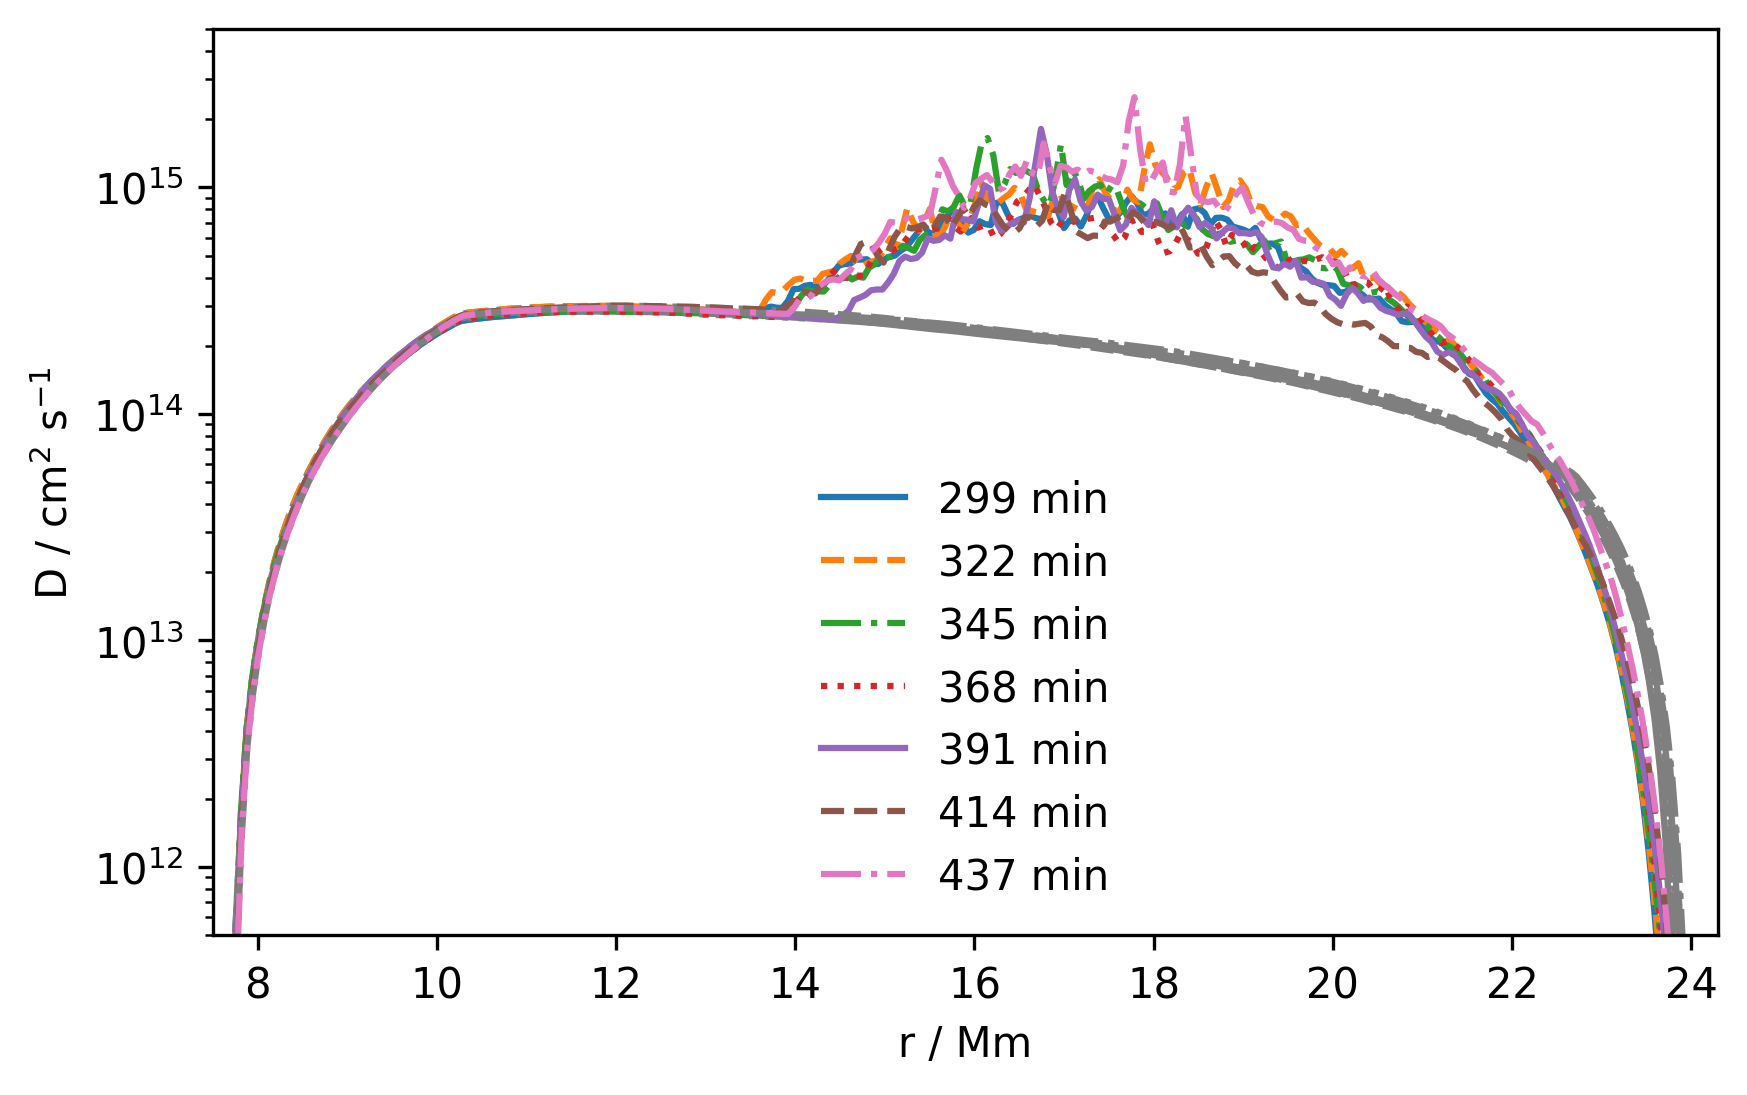

In [5]:
ifig=199;close(ifig);figure(ifig,figsize=(stdSize*stdRatio,stdSize),dpi=300)
for i,dump in enumerate(dumps):
    r = sfs[dump]['instance'].get('r')
    Dvr = sfs[dump]['instance'].get('Dvr')
    DFVvr = sfs[dump]['instance'].get('Dvr+FV')
    plt.plot(r, (Dvr), 'C7'+utils.linestylecb(i)[0])
    plt.plot(r, (DFVvr), utils.linestylecb(i)[0], label=sfs[dump]['t_m_str'])

plt.ylabel('D / cm$^2$ s$^{-1}$') ; plt.xlabel('r / Mm')   
plt.yscale('log')
plt.ylim([5*10**11, 5*10**15])
plt.xlim([7.5,24.3])
plt.title("")
plt.legend(frameon=False)
savefig('D-vr-FV-compare.pdf',bbox_inches = "tight",dpi=300)

In [6]:
# gr = 1.61803398875;size=4
# ifig=197;close(ifig);figure(ifig,figsize=(gr*size,size))
# for i,dump in enumerate(dumps):
#     sfs[dump]['instance'].plot('r','Dvr',shape='C7'+utils.linestylecb(i)[0],\
#         legend="",logy=True,limits=[7.5,24.3,10,15.5])
#     sfs[dump]['instance'].plot('r','Dvr+FV',shape=utils.linestylecb(i)[0],\
#         legend=sfs[dump]['t_m_str'],logy=True,limits=[7.5,24.3,12,16.2])
# ylabel('$\log D / \mathrm{[cm^2/s]}$') ; xlabel('$R / \mathrm{[Mm]}$')   
# title("")
# plt.tight_layout()
# savefig('D-vr-FV-compare.pdf')